# CSE474 Project : NBA Win/Loss Predictor

### Lawzeem Latif
### Sam Bond
### Matthew Johnson

##### Making Imports 

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

#### Reading the input file and making sure its correct

In [17]:
df = pd.read_csv('input/2016-17_teamBoxScore.csv')
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765


#### Getting a Correlation Matrix of all the Features in the Dataset

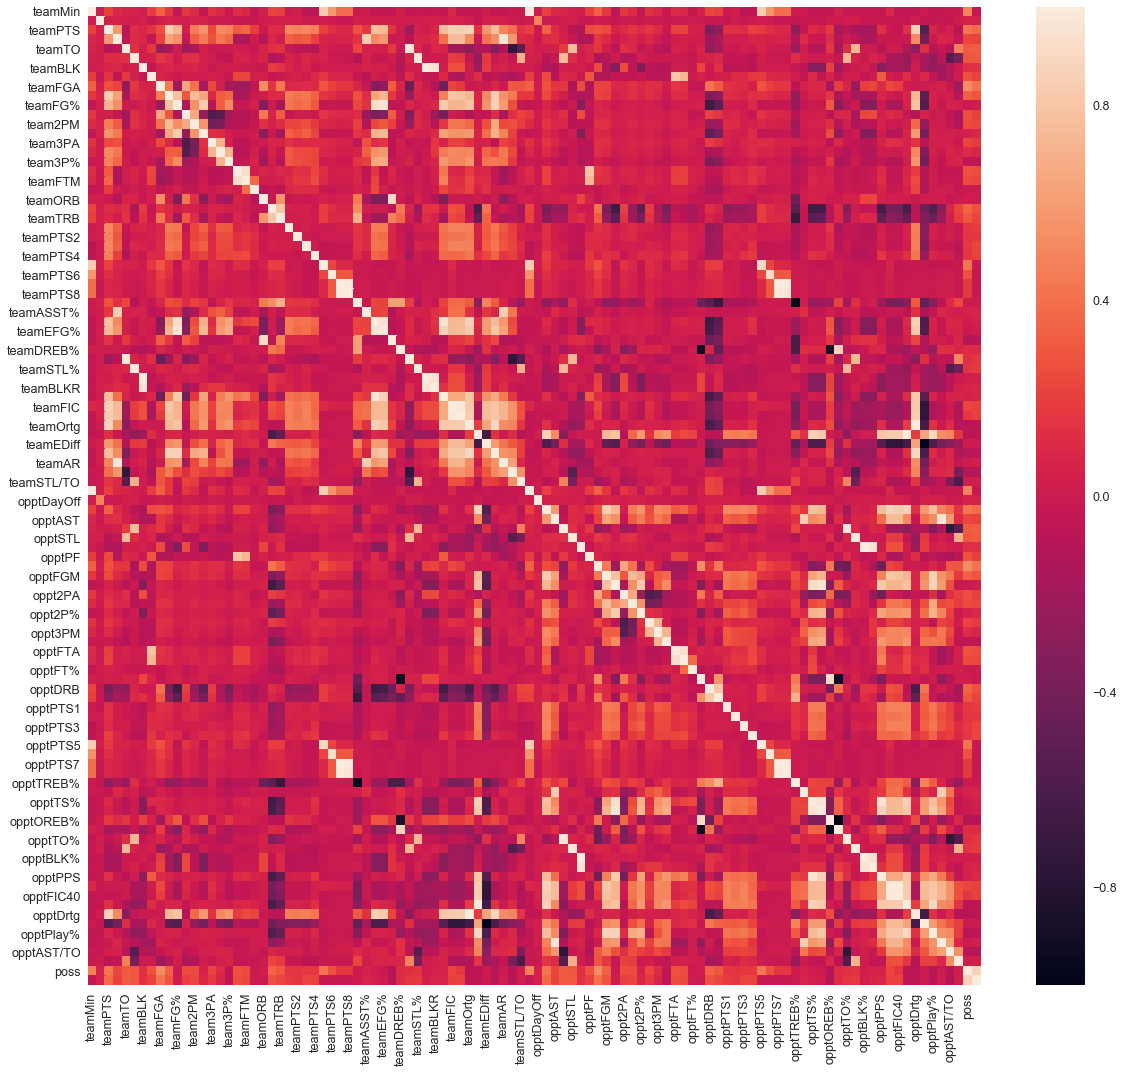

In [18]:
#correlation matrix

corrmat = df.corr()
f, ax = plt.subplots(figsize=(20,18))
sns.heatmap(corrmat, vmax=1.0)

#### Getting a Correlation Matrix of our chosen Features

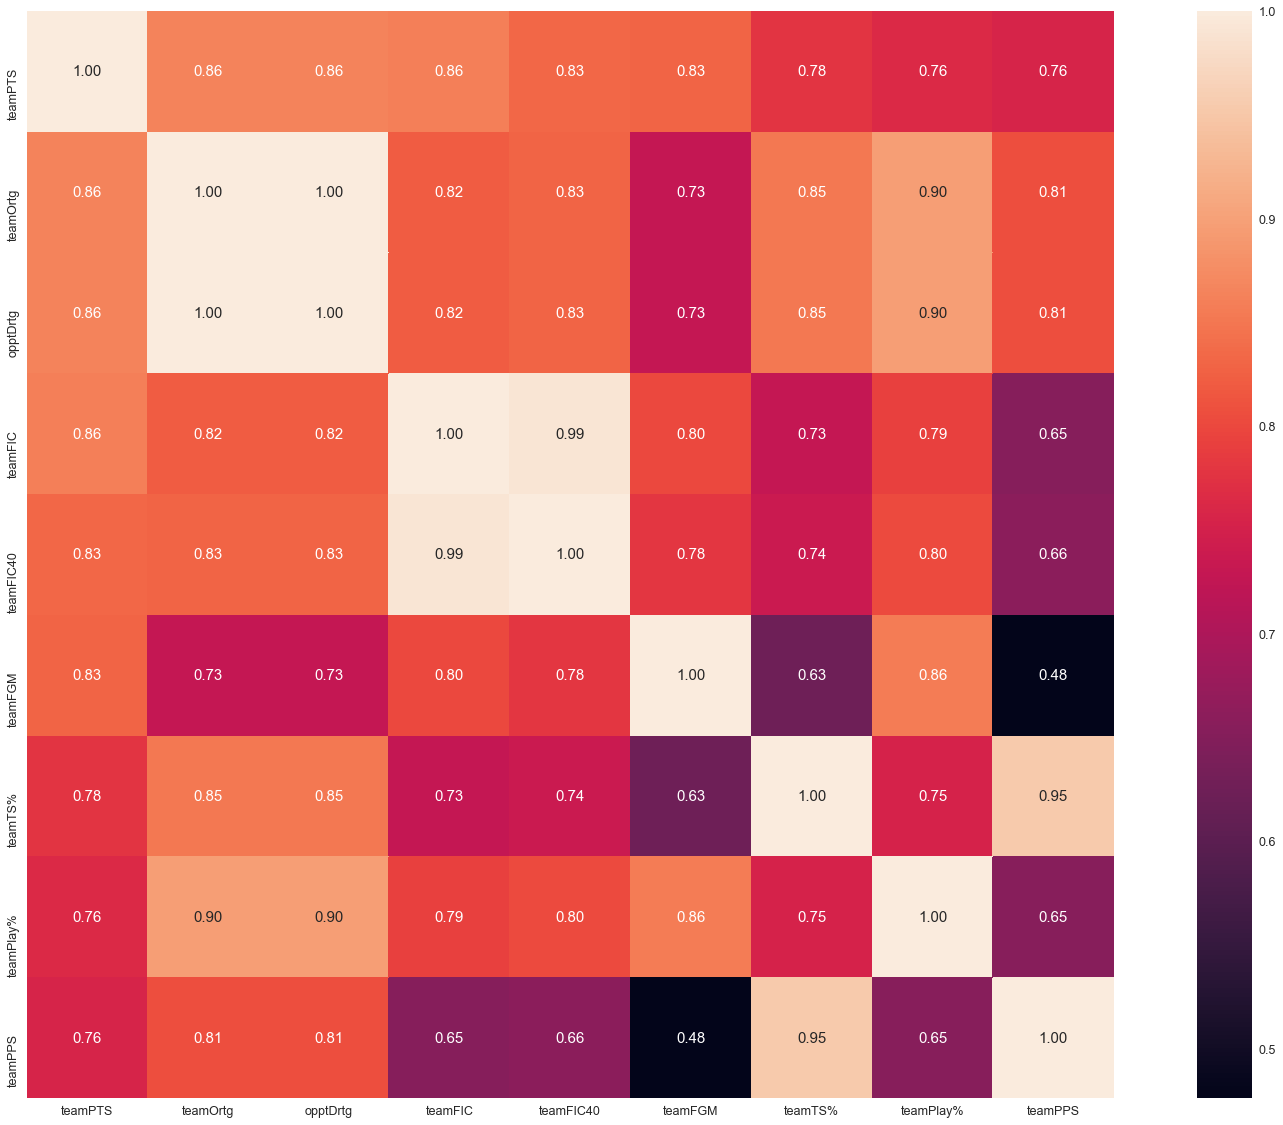

In [19]:
k = 9
corrmat = df.corr()
cols = corrmat.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(30,20))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Preparing our X and Y 

In [20]:
feature_cols = ['opptPTS', 'teamDrtg', 'teamPF', 'teamTO', 'teamORB', 'teamFGA']
x = df[feature_cols]
y = df['teamRslt']
x.head()

,opptPTS,teamDrtg,teamPF,teamTO,teamORB,teamFGA
0,117,116.5653,22,18,13,87
1,88,87.6731,22,15,11,94
2,113,122.1120,19,14,6,82
3,104,112.3863,18,13,5,75
4,100,101.2387,19,14,21,98


#### Training and Testing split as well as Standardizing the Data 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4, random_state=2)

#### Classifying with KNN and checking accuracy with test vs train  

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(knn.predict_proba(x_test))
print("Accuracy : ", metrics.accuracy_score(y_test, pred))

[[1.  0. ]
 [1.  0. ]
 [0.6 0.4]
 ...
 [0.6 0.4]
 [0.2 0.8]
 [0.4 0.6]]
Accuracy :  0.6991869918699187


#### Classifying with Linear SVM and checking accuracy with test vs train

In [23]:
clf = LinearSVC(random_state=2)
clf.fit(x_train, y_train)
print(clf.coef_)
print(clf.intercept_)
pred = (clf.predict(x_test))
print("Accuracy : ", metrics.accuracy_score(y_test, pred))

[[-0.03492523 -0.01414281  0.00432828 -0.00105895 -0.0507126   0.03945073]]
[0.59840201]
Accuracy :  0.49390243902439024


#### Classifying with Random Forest and checking accuracy with test vs train 

In [24]:
#random forest classifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
print(clf.feature_importances_)
pred = clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, pred))

[0.21182494 0.32067742 0.11306698 0.1191492  0.1082752  0.12700626]
Accuracy :  0.7215447154471545


#### Classifying with Gradient Tree Boosting and checking accuracy with test vs train

In [25]:
# Gradient Tree Boosting
clfgtb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)
print("Accuracy : ", clfgtb.score(x_test, y_test))

Accuracy :  0.75
